# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



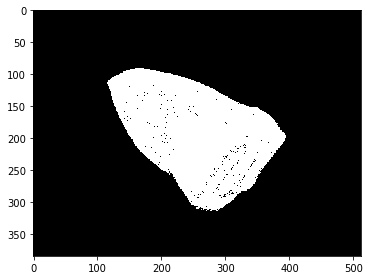

In [17]:
from skimage import io, data, color
import numpy as np
import warnings
warnings.filterwarnings("ignore")

black = np.array([0,0,0])
white = np.array([255,255,255])

image = io.imread('images/mutze.jpg')

subspace_min = np.array([0,0,0])
subspace_max = np.array([110,110,255])

image_width = len(image[0])
image_height = len(image)

binary_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

for y in range(image_height):
    for x in range(image_width):
        p = image[y,x]
        if (subspace_min[0] < p[0] < subspace_max[0]) and (subspace_min[1] < p[1] < subspace_max[1]) and (subspace_min[2] < p[2] < subspace_max[2]):
            binary_image[y,x] = white.copy()

        
io.imshow(binary_image)

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

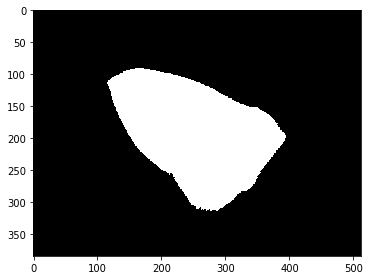

In [18]:
def dilate(x,y):
    if np.array_equal(dilated_image[y, x], white):
        return    
    for j in range(-1, 2):
        for i in range(-1, 2):
            if abs(j) == abs(i):
                continue
            xi = x + i
            yj = y + j

            if 0 <= xi < image_width and 0 <= yj < image_height:
                if np.array_equal(binary_image[yj, xi], white):
                    dilated_image[y,x] = white.copy()
                    return

def erode(x,y):
    if np.array_equal(eroded_image[y, x], black):
        return
    for j in range(-1, 2):
        for i in range(-1, 2):
            if abs(j) == abs(i):
                continue
            xi = x + i
            yj = y + j

            if 0 <= xi < image_width and 0 <= yj < image_height:
                if np.array_equal(dilated_image[yj, xi], black):
                    eroded_image[y,x] = black.copy()
                    return

                
dilated_image = binary_image.copy()

for y in range(image_height):
    for x in range(image_width):
        dilate(x,y)

#io.imshow(dilated_image)

eroded_image = dilated_image.copy()

for y in range(image_height):
    for x in range(image_width):
        erode(x,y)

#io.imshow(eroded_image)



## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)